### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

512 px cropped by Optic Disc area and resized to 128 px images were used.

You can either train your model or upload a pre-trained one from:
*../models_weights/02.03,13:57,OD Cup, U-Net light on DRISHTI-GS 512 px cropped to OD 128 px fold 0, SGD, log_dice loss/last_checkpoint.hdf5*

In [1]:
%load_ext autoreload
%autoreload 2

In [60]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
from model import *

In [4]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, \
    Conv2D, MaxPooling2D, ZeroPadding2D, Input, Embedding, \
    Lambda, UpSampling2D, Cropping2D, Concatenate
from keras.utils import np_utils
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, CSVLogger

In [5]:
print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.3.1
TensorFlow version: 1.14.0


In [6]:
K.set_image_data_format('channels_first')

In [7]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

In [8]:
model = get_unet_light(img_rows=128, img_cols=128)
model.compile(optimizer=SGD(lr=1e-4, momentum=0.95),
              loss=log_dice_loss,
              metrics=[mean_IOU_gpu, dice_metric])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\Rosana\Documents\Mestrado\dissertacao\codigo_unet\scripts\model.py:110: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input=inputs, output=conv10)


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [9]:
img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

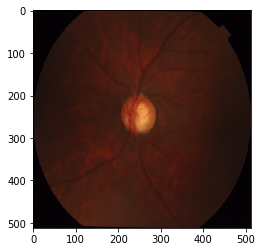

(50, 512, 512, 3)


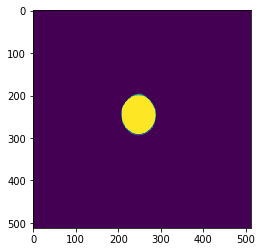

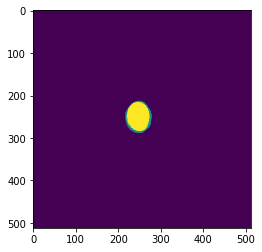

In [10]:
plt.imshow(img_train[0])
plt.show()
print(img_train.shape)
plt.imshow(np.squeeze(disc_train[0]))
plt.show()
plt.imshow(np.squeeze(cup_train[0]))
plt.show()

In [11]:
img_train, cup_train, disc_train, disc_locations

(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

#### Generator of augmented data:

Testing the data generator and generator for augmented data:

1


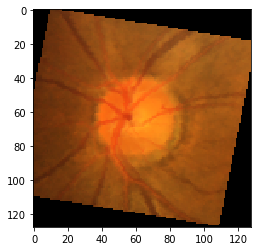

In [61]:
gen = data_generator(img_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

In [53]:
arch_name = "OD Cup, U-Net light on DRISHTI-GS 512 px cropped to OD 128 px fold 0, SGD, log_dice loss"
weights_folder = os.path.join(os.path.dirname(os.getcwd()), 'models_weights',
                              '{}'.format(arch_name))

In [54]:
def folder(folder_name):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    return folder_name

In [55]:
img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

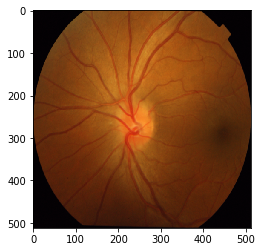

51


In [56]:
plt.imshow(img_test[50])
plt.show()
print(len(img_test))

50


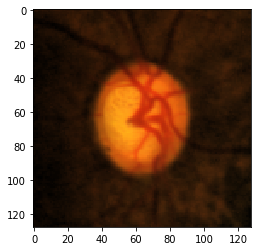

In [63]:
X_valid, Y_valid = next(data_generator(img_test, cup_test, disc_locations_test, train_or_test='test', batch_size=100, stationary=True))

In [58]:
len(X_valid)

50

### Training

If a pretrained model needs to be used, first run "Loading model" section below and then go the "Comprehensive visual check", skipping this section.

Epoch 1/1
1


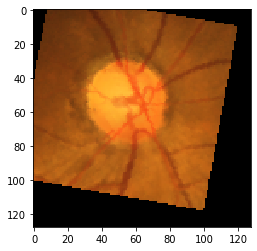

1
 1/99 [..............................] - ETA: 1:48 - loss: 1.4770 - mean_IOU_gpu: 0.1504 - dice_metric: 0.2614

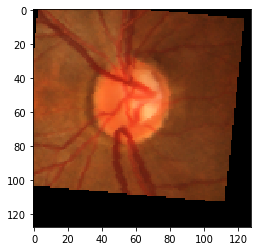

1
 2/99 [..............................] - ETA: 1:32 - loss: 1.5497 - mean_IOU_gpu: 0.1468 - dice_metric: 0.2560

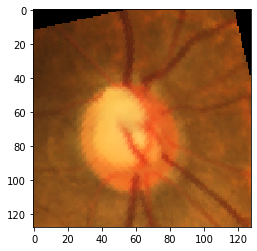

1
 3/99 [..............................] - ETA: 1:27 - loss: 1.4201 - mean_IOU_gpu: 0.1670 - dice_metric: 0.2852

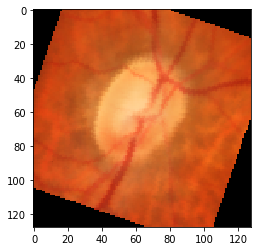

1
 4/99 [>.............................] - ETA: 1:22 - loss: 1.4409 - mean_IOU_gpu: 0.1595 - dice_metric: 0.2741

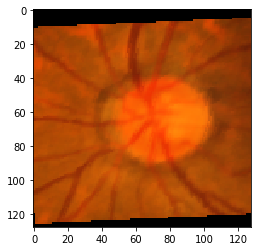

1
 5/99 [>.............................] - ETA: 1:19 - loss: 1.4299 - mean_IOU_gpu: 0.1490 - dice_metric: 0.2579

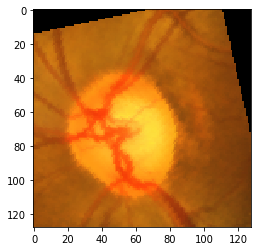

1
 6/99 [>.............................] - ETA: 1:19 - loss: 1.3629 - mean_IOU_gpu: 0.1513 - dice_metric: 0.2617

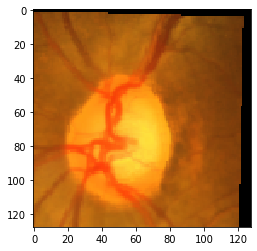

1
 7/99 [=>............................] - ETA: 1:17 - loss: 1.3137 - mean_IOU_gpu: 0.1546 - dice_metric: 0.2667

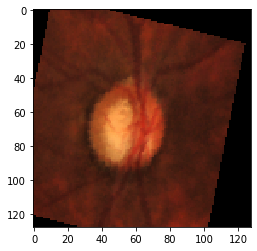

1
 8/99 [=>............................] - ETA: 1:14 - loss: 1.3503 - mean_IOU_gpu: 0.1605 - dice_metric: 0.2753

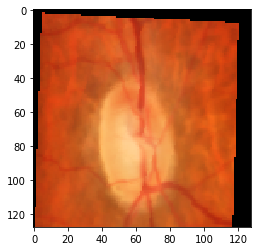

1
 9/99 [=>............................] - ETA: 1:13 - loss: 1.3603 - mean_IOU_gpu: 0.1594 - dice_metric: 0.2738

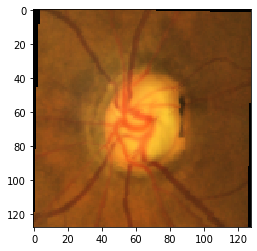

1
10/99 [==>...........................] - ETA: 1:12 - loss: 1.3452 - mean_IOU_gpu: 0.1623 - dice_metric: 0.2781

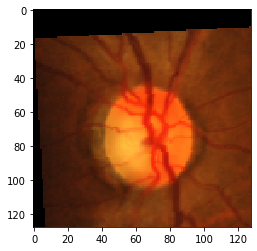

1
11/99 [==>...........................] - ETA: 1:11 - loss: 1.3445 - mean_IOU_gpu: 0.1625 - dice_metric: 0.2785

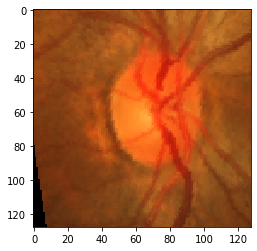

1
12/99 [==>...........................] - ETA: 1:10 - loss: 1.4043 - mean_IOU_gpu: 0.1552 - dice_metric: 0.2670

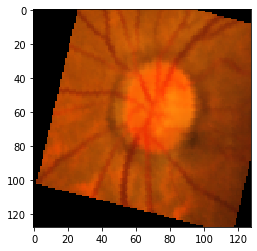

1
13/99 [==>...........................] - ETA: 1:09 - loss: 1.4156 - mean_IOU_gpu: 0.1518 - dice_metric: 0.2618

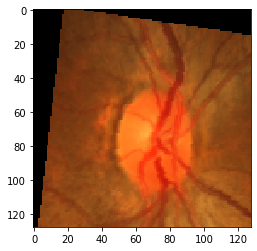

1
14/99 [===>..........................] - ETA: 1:07 - loss: 1.4798 - mean_IOU_gpu: 0.1468 - dice_metric: 0.2538

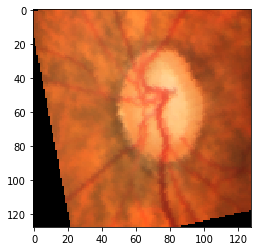

1
15/99 [===>..........................] - ETA: 1:06 - loss: 1.4666 - mean_IOU_gpu: 0.1490 - dice_metric: 0.2572

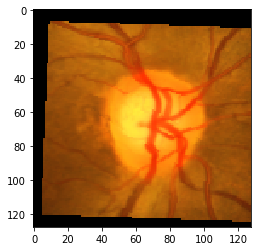

1
16/99 [===>..........................] - ETA: 1:05 - loss: 1.4568 - mean_IOU_gpu: 0.1493 - dice_metric: 0.2579

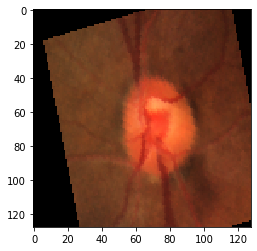

1
17/99 [====>.........................] - ETA: 1:04 - loss: 1.4835 - mean_IOU_gpu: 0.1488 - dice_metric: 0.2572

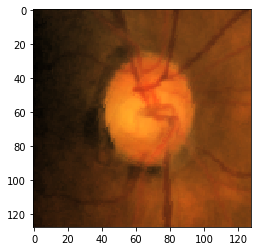

1
18/99 [====>.........................] - ETA: 1:03 - loss: 1.4770 - mean_IOU_gpu: 0.1485 - dice_metric: 0.2569

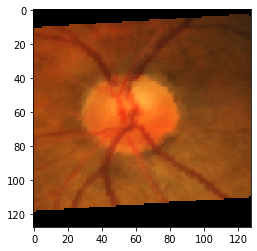

1
19/99 [====>.........................] - ETA: 1:02 - loss: 1.4915 - mean_IOU_gpu: 0.1471 - dice_metric: 0.2548

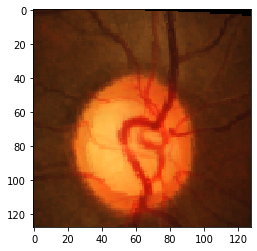

1
20/99 [=====>........................] - ETA: 1:02 - loss: 1.4618 - mean_IOU_gpu: 0.1494 - dice_metric: 0.2582

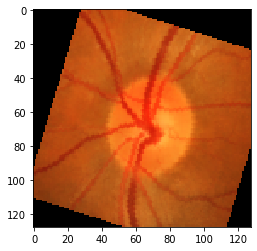

1
21/99 [=====>........................] - ETA: 1:02 - loss: 1.4856 - mean_IOU_gpu: 0.1459 - dice_metric: 0.2526

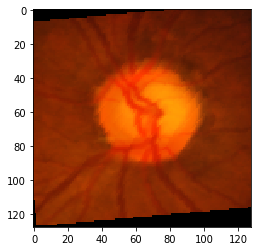

1
22/99 [=====>........................] - ETA: 1:01 - loss: 1.4738 - mean_IOU_gpu: 0.1444 - dice_metric: 0.2503

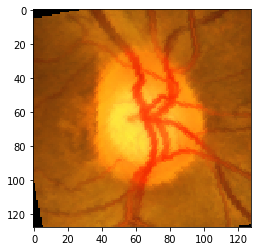

1
23/99 [=====>........................] - ETA: 1:00 - loss: 1.4566 - mean_IOU_gpu: 0.1447 - dice_metric: 0.2509

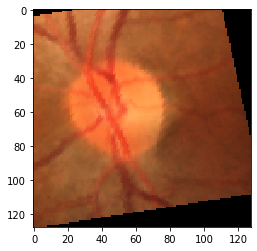

1
24/99 [======>.......................] - ETA: 59s - loss: 1.4858 - mean_IOU_gpu: 0.1416 - dice_metric: 0.2460 

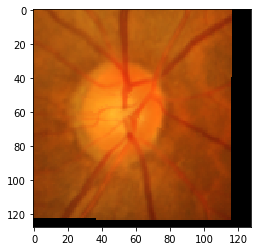

1
25/99 [======>.......................] - ETA: 59s - loss: 1.5008 - mean_IOU_gpu: 0.1399 - dice_metric: 0.2434

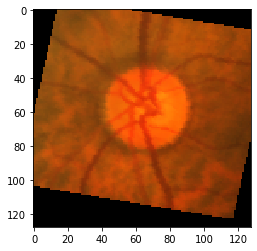

1
26/99 [======>.......................] - ETA: 58s - loss: 1.5105 - mean_IOU_gpu: 0.1377 - dice_metric: 0.2398

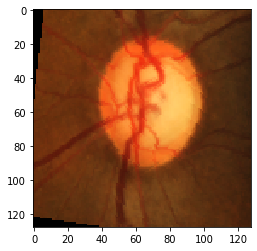

1
27/99 [=======>......................] - ETA: 57s - loss: 1.4905 - mean_IOU_gpu: 0.1402 - dice_metric: 0.2435

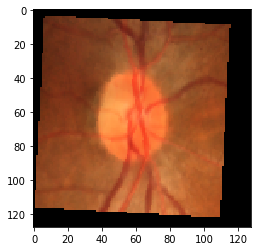

1
28/99 [=======>......................] - ETA: 57s - loss: 1.5259 - mean_IOU_gpu: 0.1378 - dice_metric: 0.2397

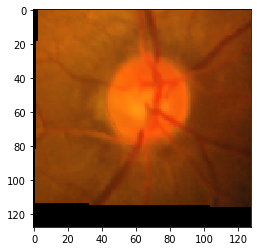

1
29/99 [=======>......................] - ETA: 56s - loss: 1.5386 - mean_IOU_gpu: 0.1364 - dice_metric: 0.2376

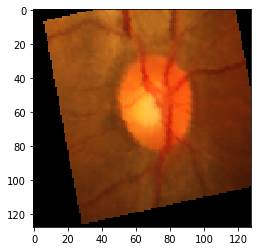

1
30/99 [========>.....................] - ETA: 55s - loss: 1.5573 - mean_IOU_gpu: 0.1370 - dice_metric: 0.2385

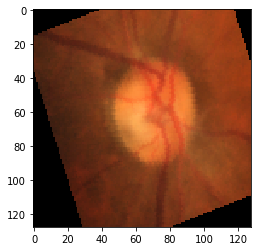

1
31/99 [========>.....................] - ETA: 54s - loss: 1.5513 - mean_IOU_gpu: 0.1372 - dice_metric: 0.2390

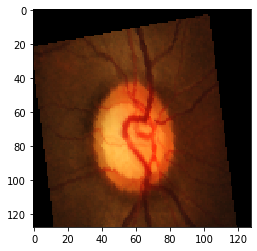

1
32/99 [========>.....................] - ETA: 54s - loss: 1.5429 - mean_IOU_gpu: 0.1384 - dice_metric: 0.2408

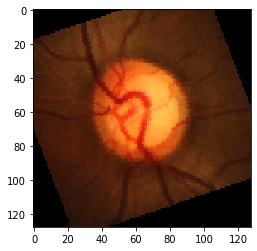

1
33/99 [=========>....................] - ETA: 53s - loss: 1.5334 - mean_IOU_gpu: 0.1391 - dice_metric: 0.2420

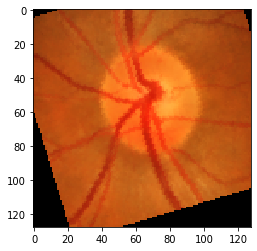

1
34/99 [=========>....................] - ETA: 52s - loss: 1.5403 - mean_IOU_gpu: 0.1374 - dice_metric: 0.2393

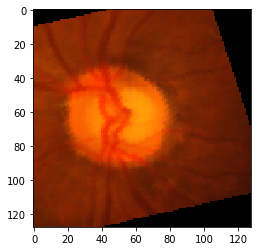

1
35/99 [=========>....................] - ETA: 51s - loss: 1.5307 - mean_IOU_gpu: 0.1359 - dice_metric: 0.2370

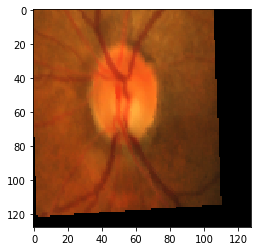

1
36/99 [=========>....................] - ETA: 51s - loss: 1.5397 - mean_IOU_gpu: 0.1350 - dice_metric: 0.2355

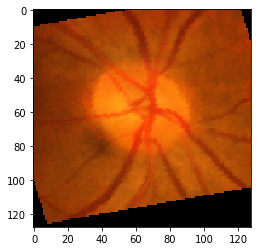

1
37/99 [==========>...................] - ETA: 50s - loss: 1.5476 - mean_IOU_gpu: 0.1335 - dice_metric: 0.2331

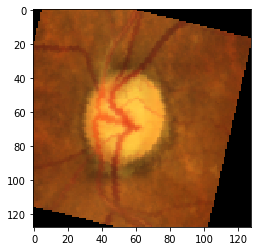

1
38/99 [==========>...................] - ETA: 49s - loss: 1.5407 - mean_IOU_gpu: 0.1347 - dice_metric: 0.2350

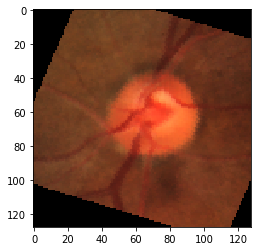

1
39/99 [==========>...................] - ETA: 48s - loss: 1.5488 - mean_IOU_gpu: 0.1345 - dice_metric: 0.2347

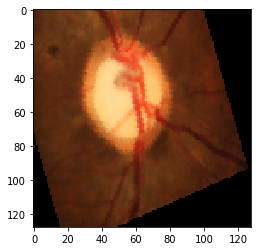

1
40/99 [===========>..................] - ETA: 47s - loss: 1.5396 - mean_IOU_gpu: 0.1380 - dice_metric: 0.2396

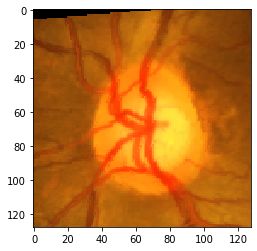

1
41/99 [===========>..................] - ETA: 46s - loss: 1.5281 - mean_IOU_gpu: 0.1383 - dice_metric: 0.2402

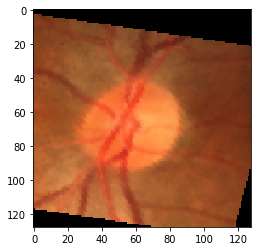

1
42/99 [===========>..................] - ETA: 45s - loss: 1.5440 - mean_IOU_gpu: 0.1371 - dice_metric: 0.2384

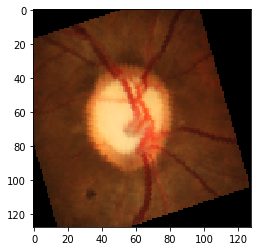

1
43/99 [============>.................] - ETA: 44s - loss: 1.5376 - mean_IOU_gpu: 0.1405 - dice_metric: 0.2430

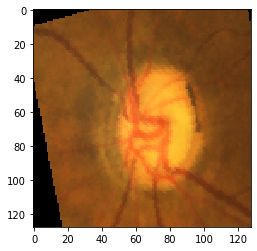

1
44/99 [============>.................] - ETA: 43s - loss: 1.5268 - mean_IOU_gpu: 0.1413 - dice_metric: 0.2443

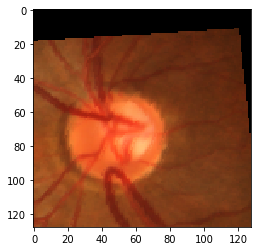

1
45/99 [============>.................] - ETA: 43s - loss: 1.5227 - mean_IOU_gpu: 0.1411 - dice_metric: 0.2440

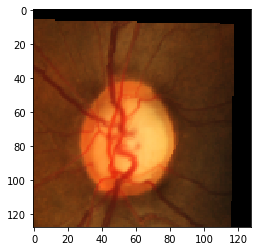

1
46/99 [============>.................] - ETA: 42s - loss: 1.5130 - mean_IOU_gpu: 0.1422 - dice_metric: 0.2457

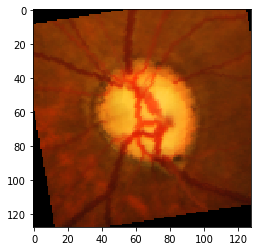

1
47/99 [=============>................] - ETA: 41s - loss: 1.5036 - mean_IOU_gpu: 0.1419 - dice_metric: 0.2453

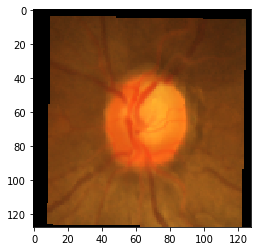

1
48/99 [=============>................] - ETA: 40s - loss: 1.5019 - mean_IOU_gpu: 0.1415 - dice_metric: 0.2448

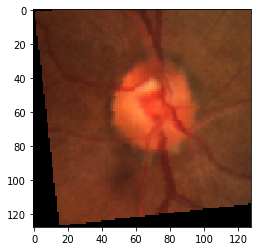

1
49/99 [=============>................] - ETA: 39s - loss: 1.5093 - mean_IOU_gpu: 0.1407 - dice_metric: 0.2436

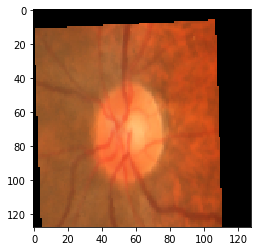

1
50/99 [==============>...............] - ETA: 39s - loss: 1.5191 - mean_IOU_gpu: 0.1402 - dice_metric: 0.2428

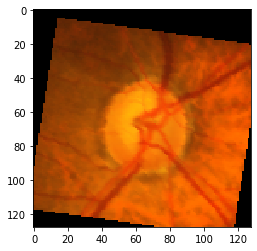

1
51/99 [==============>...............] - ETA: 38s - loss: 1.5157 - mean_IOU_gpu: 0.1390 - dice_metric: 0.2409

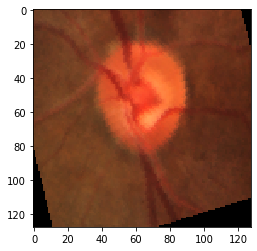

1
52/99 [==============>...............] - ETA: 37s - loss: 1.5181 - mean_IOU_gpu: 0.1383 - dice_metric: 0.2399

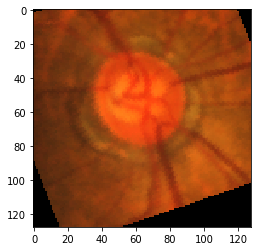

1
53/99 [===============>..............] - ETA: 36s - loss: 1.5183 - mean_IOU_gpu: 0.1369 - dice_metric: 0.2378

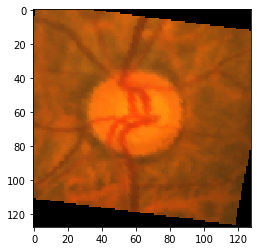

1
54/99 [===============>..............] - ETA: 35s - loss: 1.5184 - mean_IOU_gpu: 0.1360 - dice_metric: 0.2362

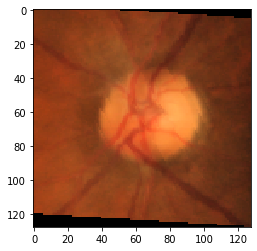

1
55/99 [===============>..............] - ETA: 35s - loss: 1.5143 - mean_IOU_gpu: 0.1361 - dice_metric: 0.2366

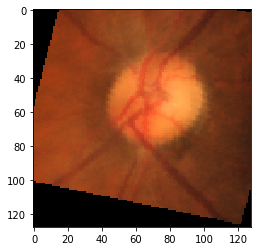

1
56/99 [===============>..............] - ETA: 34s - loss: 1.5114 - mean_IOU_gpu: 0.1362 - dice_metric: 0.2366

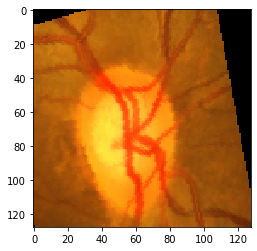

1
57/99 [================>.............] - ETA: 33s - loss: 1.5040 - mean_IOU_gpu: 0.1363 - dice_metric: 0.2369

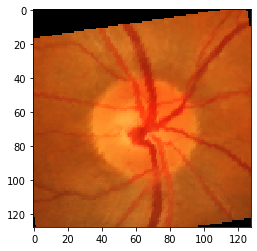

1
58/99 [================>.............] - ETA: 32s - loss: 1.5081 - mean_IOU_gpu: 0.1352 - dice_metric: 0.2352

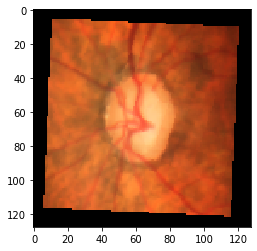

1
59/99 [================>.............] - ETA: 32s - loss: 1.5094 - mean_IOU_gpu: 0.1360 - dice_metric: 0.2364

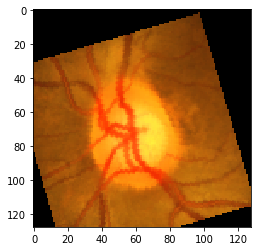

1
60/99 [=================>............] - ETA: 31s - loss: 1.5069 - mean_IOU_gpu: 0.1360 - dice_metric: 0.2365

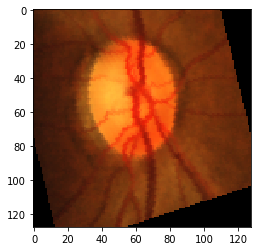

1
61/99 [=================>............] - ETA: 30s - loss: 1.5023 - mean_IOU_gpu: 0.1358 - dice_metric: 0.2362

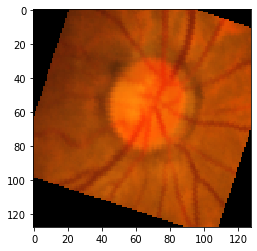

1
62/99 [=================>............] - ETA: 29s - loss: 1.5023 - mean_IOU_gpu: 0.1345 - dice_metric: 0.2340

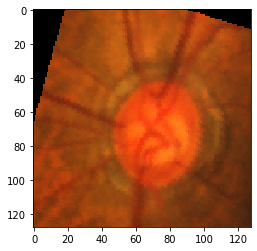

1
63/99 [==================>...........] - ETA: 29s - loss: 1.5017 - mean_IOU_gpu: 0.1334 - dice_metric: 0.2323

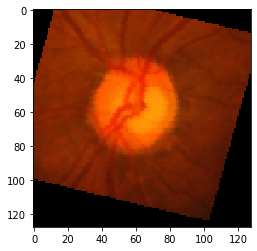

1
64/99 [==================>...........] - ETA: 28s - loss: 1.4999 - mean_IOU_gpu: 0.1324 - dice_metric: 0.2306

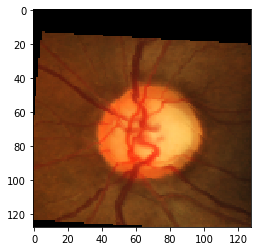

1
65/99 [==================>...........] - ETA: 27s - loss: 1.4947 - mean_IOU_gpu: 0.1331 - dice_metric: 0.2318

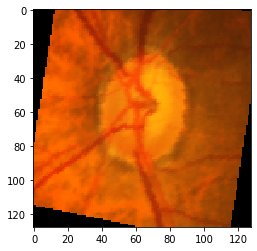

1
66/99 [===================>..........] - ETA: 26s - loss: 1.4905 - mean_IOU_gpu: 0.1321 - dice_metric: 0.2302

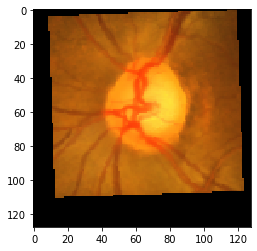

1
67/99 [===================>..........] - ETA: 25s - loss: 1.4890 - mean_IOU_gpu: 0.1323 - dice_metric: 0.2305

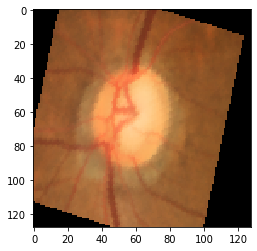

1
68/99 [===================>..........] - ETA: 25s - loss: 1.4860 - mean_IOU_gpu: 0.1339 - dice_metric: 0.2328

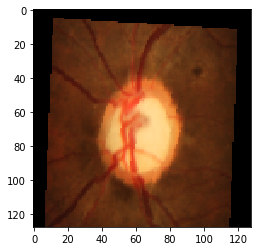

1
69/99 [===================>..........] - ETA: 24s - loss: 1.4828 - mean_IOU_gpu: 0.1356 - dice_metric: 0.2353

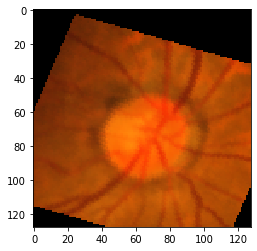

1
70/99 [====================>.........] - ETA: 23s - loss: 1.4827 - mean_IOU_gpu: 0.1346 - dice_metric: 0.2337

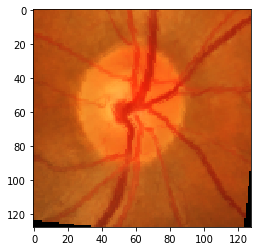

1
71/99 [====================>.........] - ETA: 22s - loss: 1.4846 - mean_IOU_gpu: 0.1338 - dice_metric: 0.2325

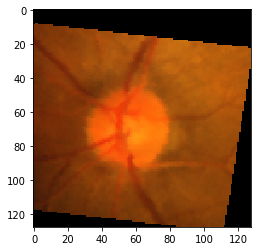

1
72/99 [====================>.........] - ETA: 21s - loss: 1.4914 - mean_IOU_gpu: 0.1331 - dice_metric: 0.2313

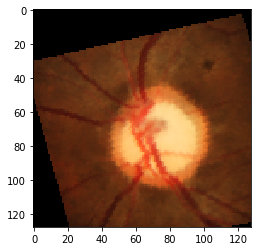

1
73/99 [=====================>........] - ETA: 21s - loss: 1.4870 - mean_IOU_gpu: 0.1354 - dice_metric: 0.2344

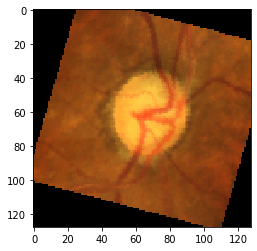

1
74/99 [=====================>........] - ETA: 20s - loss: 1.4858 - mean_IOU_gpu: 0.1354 - dice_metric: 0.2346

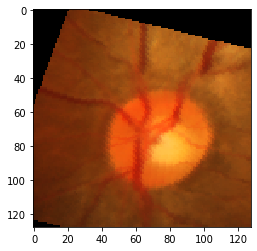

1
75/99 [=====================>........] - ETA: 19s - loss: 1.4899 - mean_IOU_gpu: 0.1351 - dice_metric: 0.2342

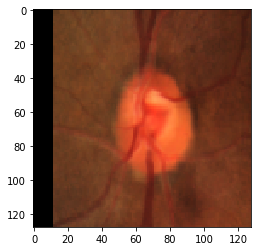

1
76/99 [======================>.......] - ETA: 18s - loss: 1.4937 - mean_IOU_gpu: 0.1345 - dice_metric: 0.2332

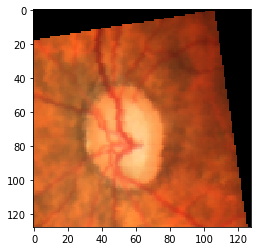

1
77/99 [======================>.......] - ETA: 17s - loss: 1.4922 - mean_IOU_gpu: 0.1353 - dice_metric: 0.2344

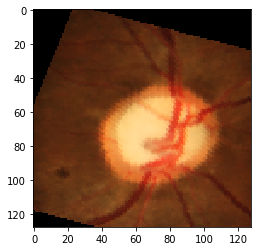

1
78/99 [======================>.......] - ETA: 16s - loss: 1.4868 - mean_IOU_gpu: 0.1369 - dice_metric: 0.2368

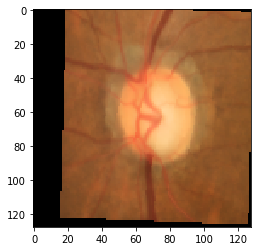

1
79/99 [======================>.......] - ETA: 16s - loss: 1.4847 - mean_IOU_gpu: 0.1383 - dice_metric: 0.2387

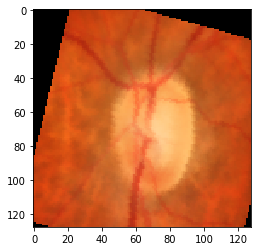

1
80/99 [=======================>......] - ETA: 15s - loss: 1.4833 - mean_IOU_gpu: 0.1390 - dice_metric: 0.2399

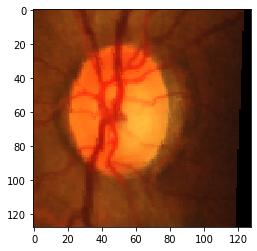

1
81/99 [=======================>......] - ETA: 14s - loss: 1.4782 - mean_IOU_gpu: 0.1386 - dice_metric: 0.2392

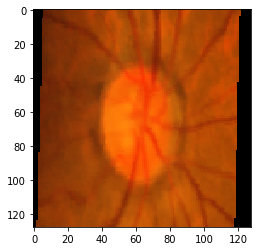

1
82/99 [=======================>......] - ETA: 13s - loss: 1.4767 - mean_IOU_gpu: 0.1376 - dice_metric: 0.2376

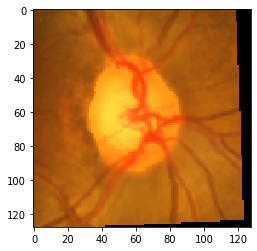

1
83/99 [========================>.....] - ETA: 12s - loss: 1.4729 - mean_IOU_gpu: 0.1375 - dice_metric: 0.2375

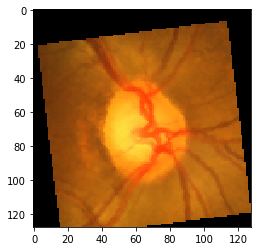

1
84/99 [========================>.....] - ETA: 12s - loss: 1.4711 - mean_IOU_gpu: 0.1374 - dice_metric: 0.2375

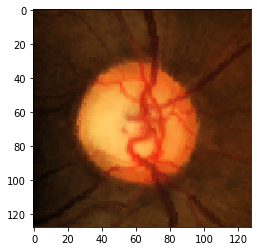

1
85/99 [========================>.....] - ETA: 11s - loss: 1.4643 - mean_IOU_gpu: 0.1376 - dice_metric: 0.2378

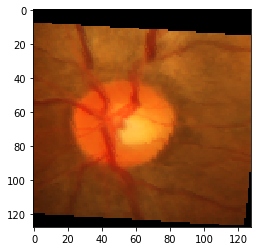

1
86/99 [=========================>....] - ETA: 10s - loss: 1.4691 - mean_IOU_gpu: 0.1372 - dice_metric: 0.2372

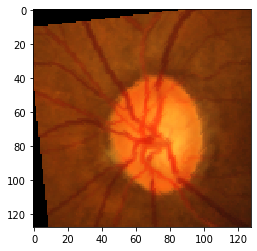

1
87/99 [=========================>....] - ETA: 9s - loss: 1.4651 - mean_IOU_gpu: 0.1366 - dice_metric: 0.2363 

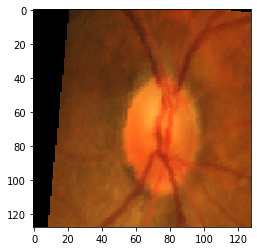

1
88/99 [=========================>....] - ETA: 8s - loss: 1.4667 - mean_IOU_gpu: 0.1362 - dice_metric: 0.2356

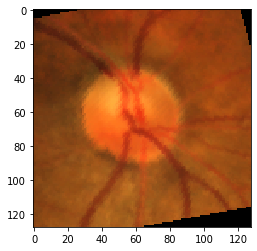

1
89/99 [=========================>....] - ETA: 8s - loss: 1.4676 - mean_IOU_gpu: 0.1356 - dice_metric: 0.2348

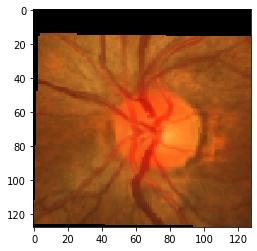

1
90/99 [==========================>...] - ETA: 7s - loss: 1.4777 - mean_IOU_gpu: 0.1349 - dice_metric: 0.2336

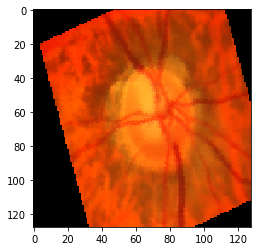

1
91/99 [==========================>...] - ETA: 6s - loss: 1.4773 - mean_IOU_gpu: 0.1343 - dice_metric: 0.2328

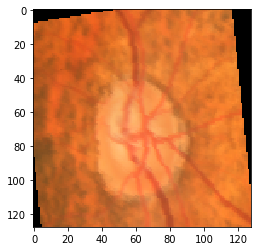

1
92/99 [==========================>...] - ETA: 5s - loss: 1.4742 - mean_IOU_gpu: 0.1345 - dice_metric: 0.2331

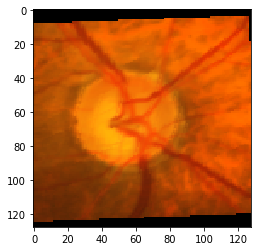

1
93/99 [===========================>..] - ETA: 4s - loss: 1.4709 - mean_IOU_gpu: 0.1338 - dice_metric: 0.2319

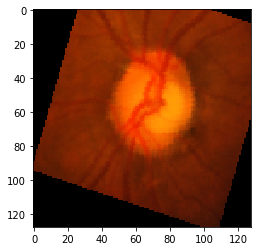

1
94/99 [===========================>..] - ETA: 4s - loss: 1.4696 - mean_IOU_gpu: 0.1330 - dice_metric: 0.2307

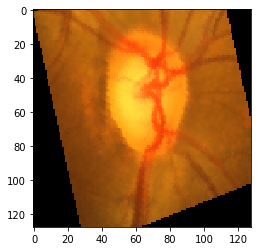

1
95/99 [===========================>..] - ETA: 3s - loss: 1.4665 - mean_IOU_gpu: 0.1332 - dice_metric: 0.2310

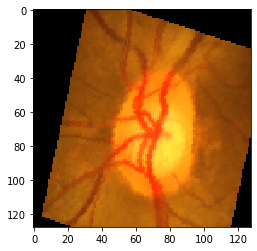

1
96/99 [============================>.] - ETA: 2s - loss: 1.4646 - mean_IOU_gpu: 0.1334 - dice_metric: 0.2313

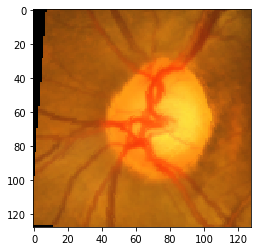

1
97/99 [============================>.] - ETA: 1s - loss: 1.4603 - mean_IOU_gpu: 0.1333 - dice_metric: 0.2313

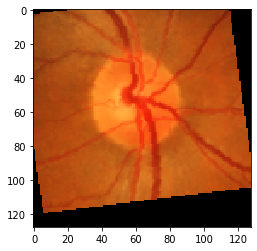

1
98/99 [============================>.] - ETA: 0s - loss: 1.4650 - mean_IOU_gpu: 0.1328 - dice_metric: 0.2304

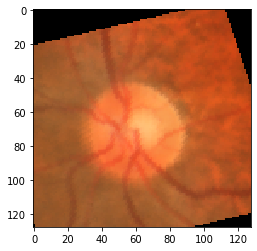

1


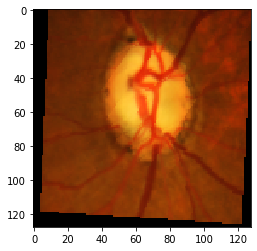

1


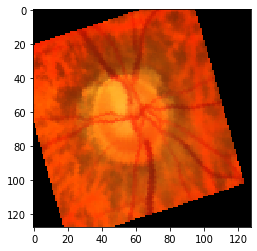

99/99 [==============================] - 86s 873ms/step - loss: 1.4676 - mean_IOU_gpu: 0.1331 - dice_metric: 0.2309 - val_loss: 1.4473 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00


In [64]:
history = model.fit_generator(data_generator(img_train, cup_train, disc_locations, train_or_test='train', batch_size=1), 
                              steps_per_epoch=99,
                              max_queue_size=1,                    
                              validation_data=(X_valid, Y_valid),                              
                              epochs=1, verbose=1,                              
                              callbacks=[CSVLogger(os.path.join(folder(weights_folder), 'training_log_cup_color.csv')),
                                         ModelCheckpoint(os.path.join(folder(weights_folder),
                                               'last_checkpoint_cup_color.hdf5'),
                                               monitor='val_loss', mode='min', save_best_only=True, 
                                               save_weights_only=False, verbose=0)])

### Visual check

image #0


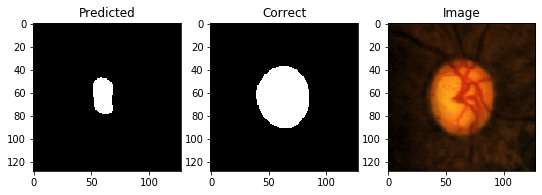

IOU: 0.23829130828380585
Dice: 0.3848711554447215
image #1


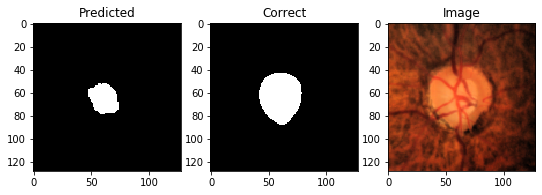

IOU: 0.41543257236480713
Dice: 0.5870044052863436
image #2


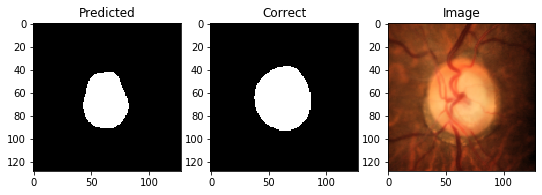

IOU: 0.7076707482337952
Dice: 0.8288140235551904
image #3


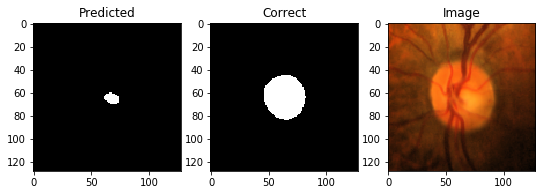

IOU: 0.08948339521884918
Dice: 0.1642675698560542
image #4


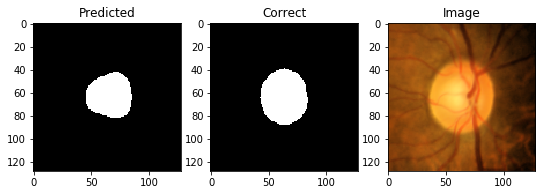

IOU: 0.751091718673706
Dice: 0.85785536159601
image #5


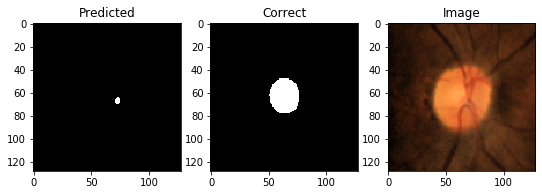

IOU: 0.028846153989434242
Dice: 0.056074766355140186
image #6


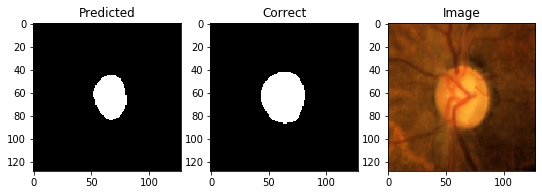

IOU: 0.6350746154785156
Dice: 0.776814240073026
image #7


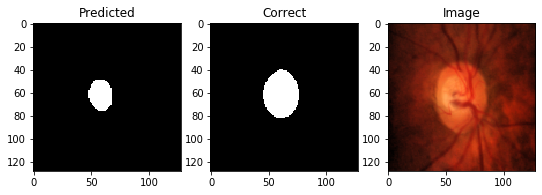

IOU: 0.4395604431629181
Dice: 0.6106870229007634
image #8


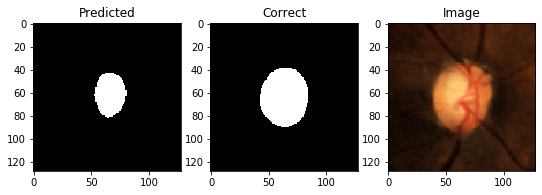

IOU: 0.47882354259490967
Dice: 0.6475735879077168
image #9


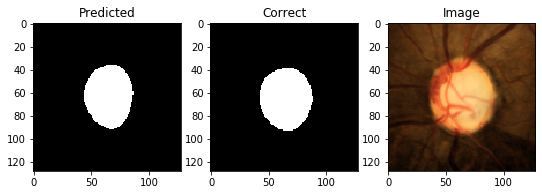

IOU: 0.8660049438476562
Dice: 0.9281914893617021
image #10


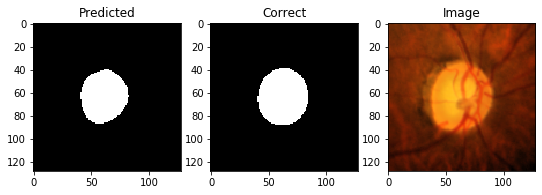

IOU: 0.8539977073669434
Dice: 0.92125
image #11


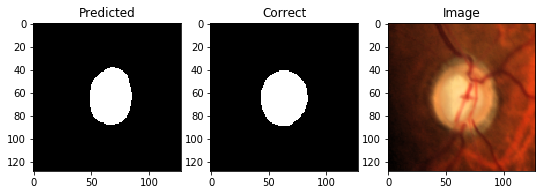

IOU: 0.784907877445221
Dice: 0.8794940079893475
image #12


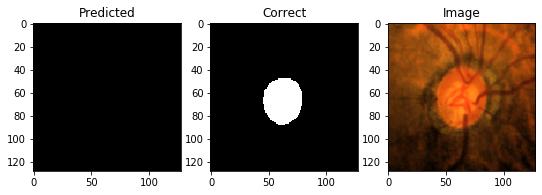

IOU: 0.0
Dice: 0.0
image #13


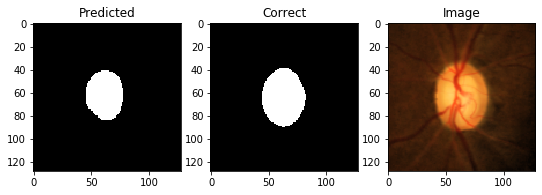

IOU: 0.7540872097015381
Dice: 0.8598058252427184
image #14


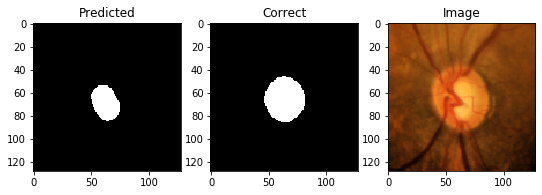

IOU: 0.533707857131958
Dice: 0.6959706959706959
image #15


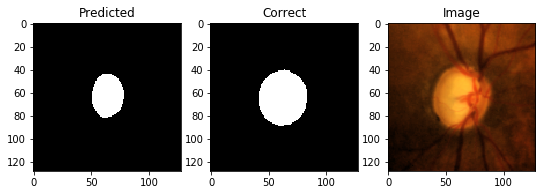

IOU: 0.5225846767425537
Dice: 0.6864441697569015
image #16


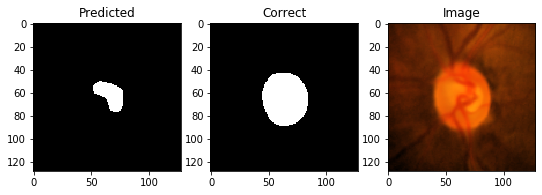

IOU: 0.2904762029647827
Dice: 0.45018450184501846
image #17


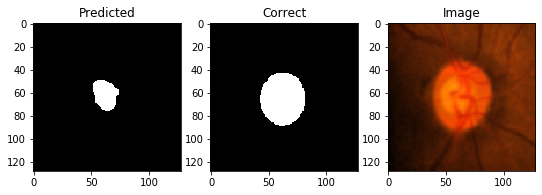

IOU: 0.3118355870246887
Dice: 0.47541869259859537
image #18


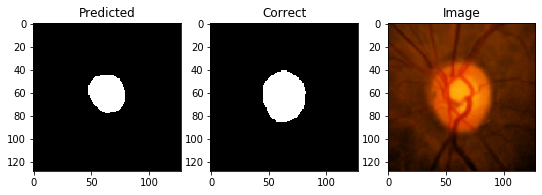

IOU: 0.6475600600242615
Dice: 0.7860836859426422
image #19


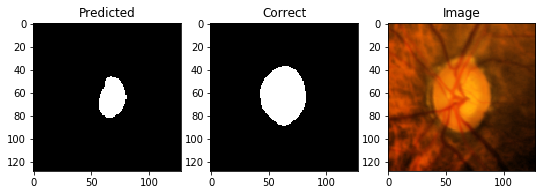

IOU: 0.40631037950515747
Dice: 0.5778388278388278
image #20


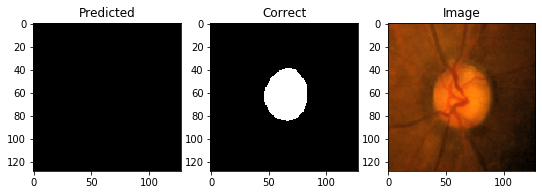

IOU: 0.0
Dice: 0.0
image #21


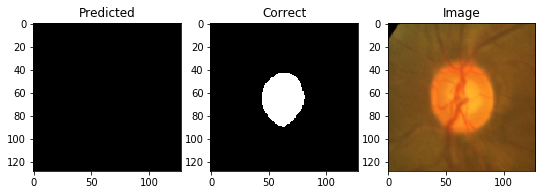

IOU: 0.0
Dice: 0.0
image #22


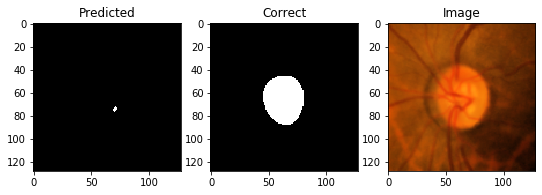

IOU: 0.010152284055948257
Dice: 0.020100502512562814
image #23


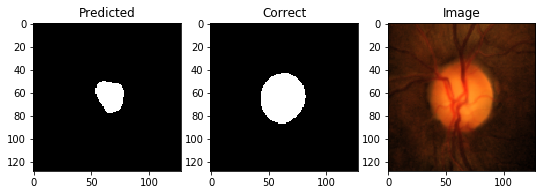

IOU: 0.39453718066215515
Dice: 0.5658324265505985
image #24


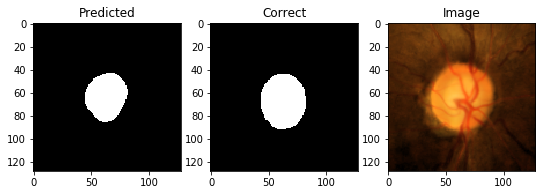

IOU: 0.7514753937721252
Dice: 0.8581055784350431
image #25


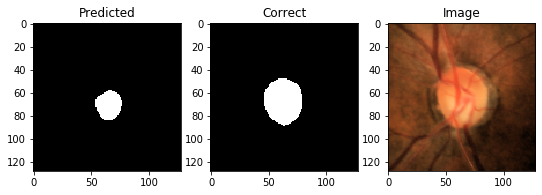

IOU: 0.4303317666053772
Dice: 0.6017229953611664
image #26


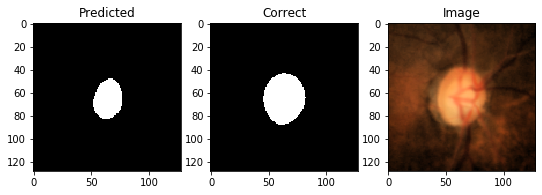

IOU: 0.5447220206260681
Dice: 0.7052686489306208
image #27


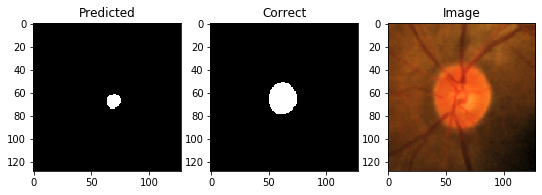

IOU: 0.2178770899772644
Dice: 0.3577981651376147
image #28


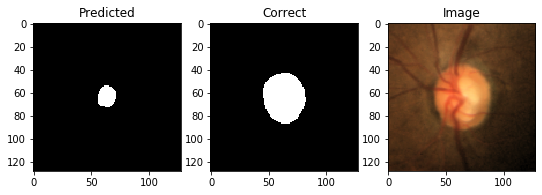

IOU: 0.19285714626312256
Dice: 0.32335329341317365
image #29


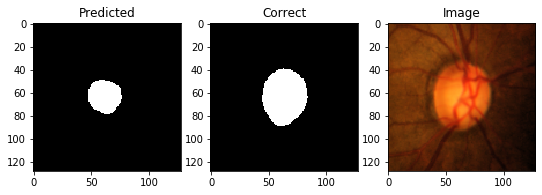

IOU: 0.4537474811077118
Dice: 0.6242452392011147
image #30


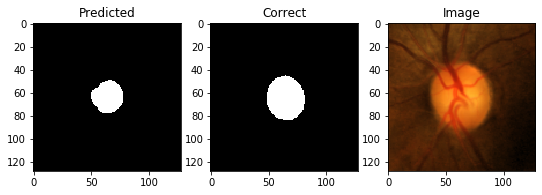

IOU: 0.6026026010513306
Dice: 0.7520299812617114
image #31


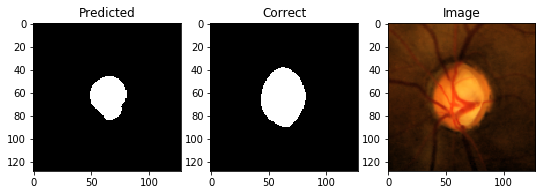

IOU: 0.5904255509376526
Dice: 0.7424749163879598
image #32


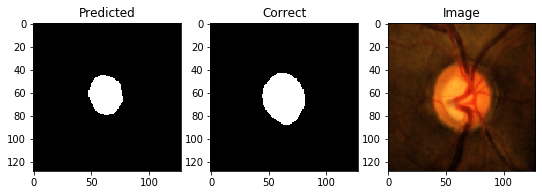

IOU: 0.6343223452568054
Dice: 0.7762512266928361
image #33


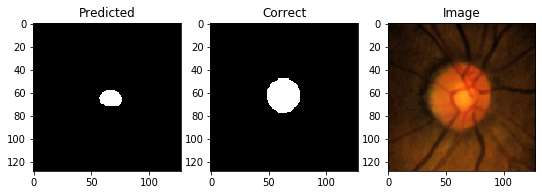

IOU: 0.32894736528396606
Dice: 0.49504950495049505
image #34


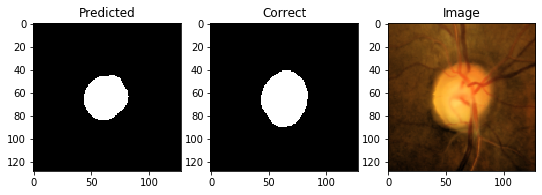

IOU: 0.7575957775115967
Dice: 0.8620819240886884
image #35


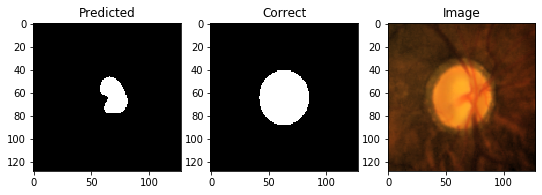

IOU: 0.33496931195259094
Dice: 0.5018382352941176
image #36


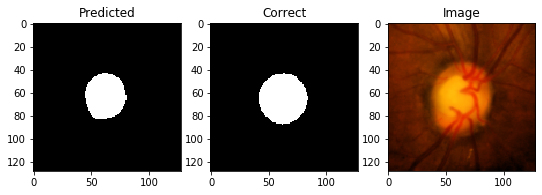

IOU: 0.7689133286476135
Dice: 0.8693623639191291
image #37


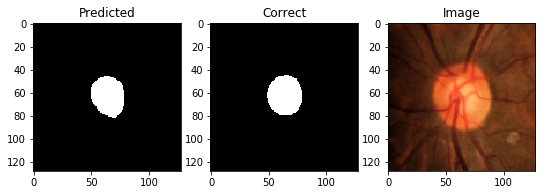

IOU: 0.8933030366897583
Dice: 0.9436450839328537
image #38


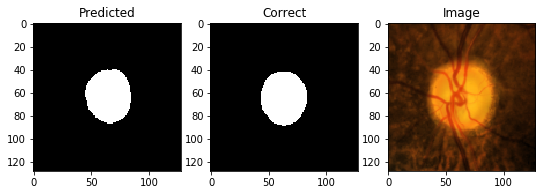

IOU: 0.8602150678634644
Dice: 0.9248554913294798
image #39


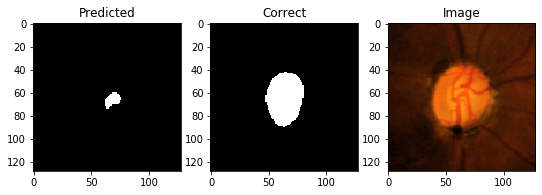

IOU: 0.10726351290941238
Dice: 0.19374523264683446
image #40


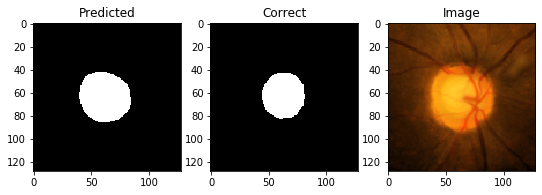

IOU: 0.7358730435371399
Dice: 0.8478419897585955
image #41


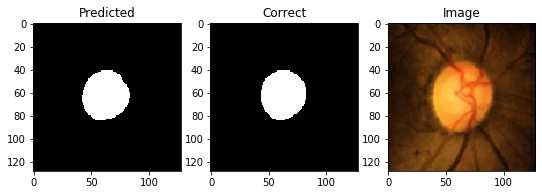

IOU: 0.9350000023841858
Dice: 0.9664082687338501
image #42


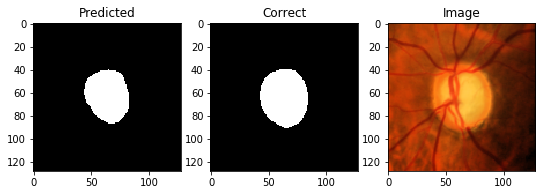

IOU: 0.8349339962005615
Dice: 0.910042525351652
image #43


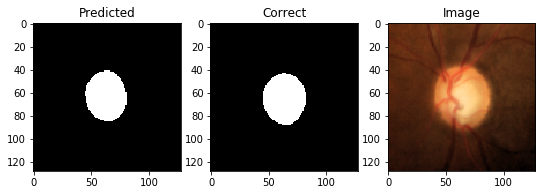

IOU: 0.8428362607955933
Dice: 0.9147163823879413
image #44


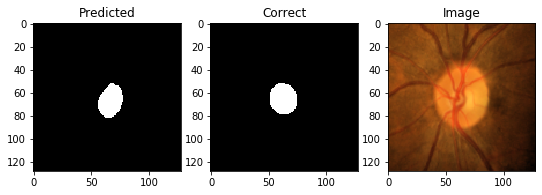

IOU: 0.6091205477714539
Dice: 0.757085020242915
image #45


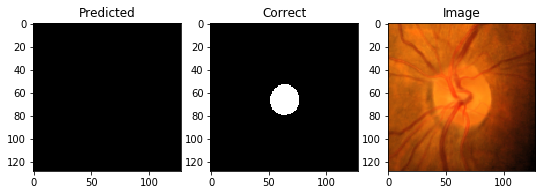

IOU: 0.0
Dice: 0.0
image #46


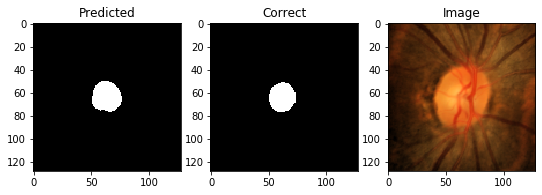

IOU: 0.8165467381477356
Dice: 0.899009900990099
image #47


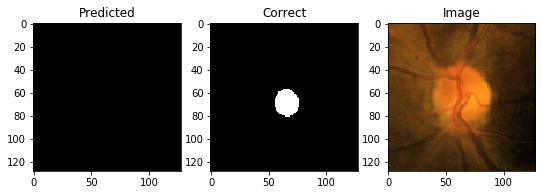

IOU: 0.0
Dice: 0.0
image #48


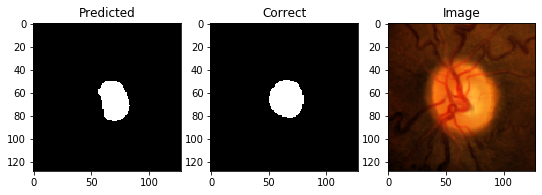

IOU: 0.6875
Dice: 0.8148148148148148
image #49


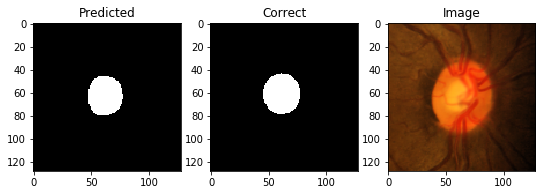

IOU: 0.8606645464897156
Dice: 0.9251152073732719


In [79]:
pred_iou, pred_dice = [], []
pred_cup = []

for i, img_no in enumerate(test_idx):
    print('image #{}'.format(img_no))
    img = img_test[img_no]
    batch_X = X_valid[i:i + 1]
    batch_y = Y_valid[i:i + 1]
    
    pred = (model.predict(batch_X)[0, 0] > 0.5).astype(np.float64)
    pred_cup.append(pred)
    corr = th_to_tf_encoding(batch_y)[0, ..., 0]
        
    fig = plt.figure(figsize=(9, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(pred, cmap=plt.cm.Greys_r)
    ax.set_title('Predicted')
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(corr, cmap=plt.cm.Greys_r)
    ax.set_title('Correct')
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(th_to_tf_encoding(batch_X)[0])
    ax.set_title('Image')
    plt.show()
    
    cur_iou = K.eval(mean_IOU_gpu(pred[None, None, ...], corr[None, None, ...]))
    cur_dice = K.eval(dice(pred[None, None, ...], corr[None, None, ...]))
    print('IOU: {}\nDice: {}'.format(cur_iou, cur_dice))
    pred_iou.append(cur_iou)
    pred_dice.append(cur_dice)

Acquiring scores for the validation set:

In [80]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.4990496
0.6065487789844111


### Loading model

In [69]:
X_valid, Z_valid = next(data_generator_test(img_test, disc_test, disc_locations_test, train_or_test='test', batch_size=100, stationary=True))

In [70]:
history = model.fit_generator(data_generator(img_train, disc_train, disc_locations, train_or_test='train', batch_size=1), 
                              steps_per_epoch=99,
                              max_queue_size=1,                    
                              validation_data=(X_valid, Z_valid),                              
                              epochs=500, verbose=1,                              
                              callbacks=[CSVLogger(os.path.join(folder(weights_folder), 'training_log_disc_color.csv')),
                                         ModelCheckpoint(os.path.join(folder(weights_folder),
                                               'last_checkpoint_disc_color.hdf5'),
                                               monitor='val_loss', mode='min', save_best_only=True, 
                                               save_weights_only=False, verbose=0)])

Epoch 1/1
99/99 [==============================] - 33s 337ms/step - loss: 0.9925 - mean_IOU_gpu: 0.0154 - dice_metric: 0.0301 - val_loss: 0.9767 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00


image #0


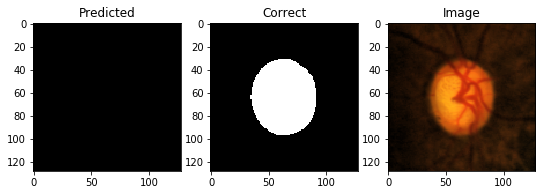

IOU: 0.0
Dice: 0.0
image #1


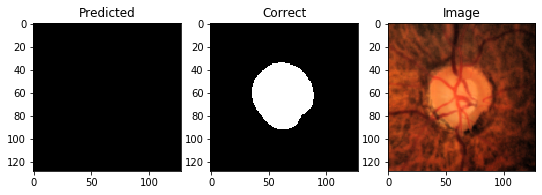

IOU: 0.0
Dice: 0.0
image #2


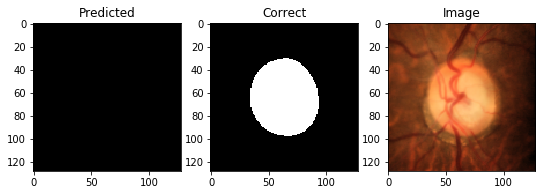

IOU: 0.0
Dice: 0.0
image #3


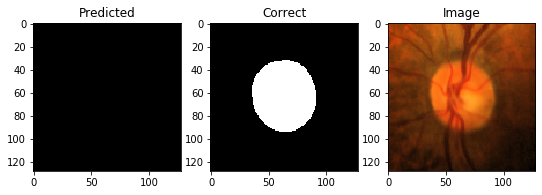

IOU: 0.0
Dice: 0.0
image #4


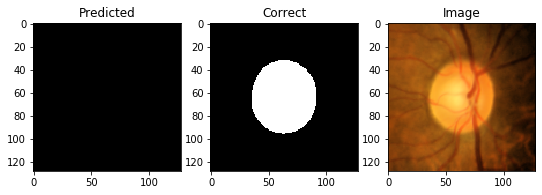

IOU: 0.0
Dice: 0.0
image #5


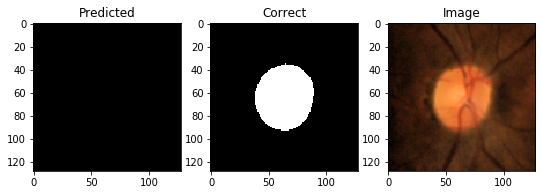

IOU: 0.0
Dice: 0.0
image #6


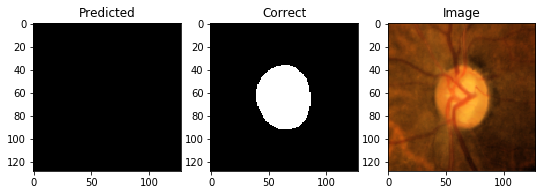

IOU: 0.0
Dice: 0.0
image #7


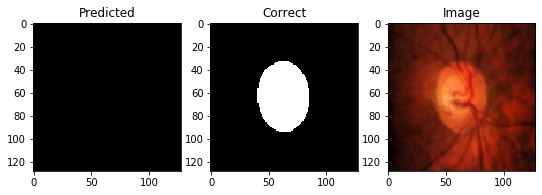

IOU: 0.0
Dice: 0.0
image #8


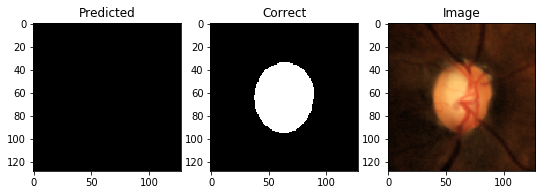

IOU: 0.0
Dice: 0.0
image #9


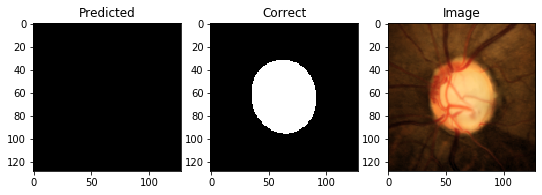

IOU: 0.0
Dice: 0.0
image #10


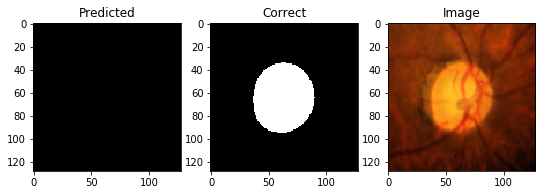

IOU: 0.0
Dice: 0.0
image #11


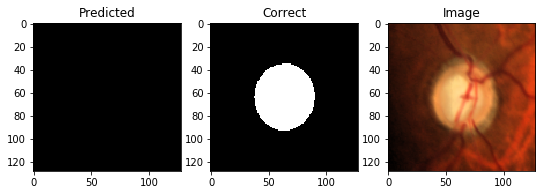

IOU: 0.0
Dice: 0.0
image #12


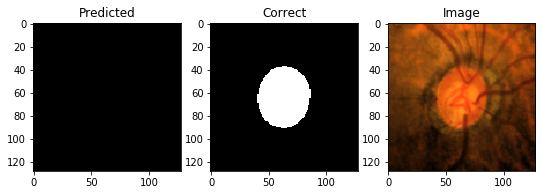

IOU: 0.0
Dice: 0.0
image #13


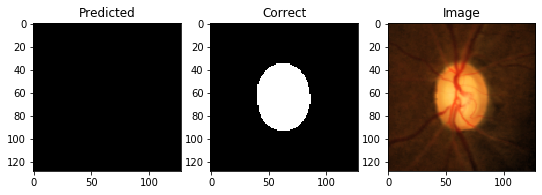

IOU: 0.0
Dice: 0.0
image #14


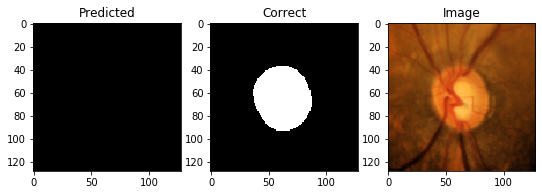

IOU: 0.0
Dice: 0.0
image #15


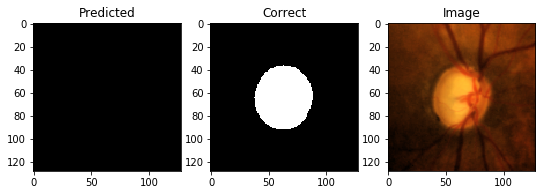

IOU: 0.0
Dice: 0.0
image #16


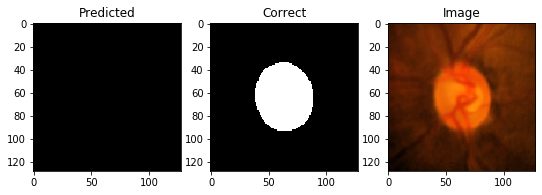

IOU: 0.0
Dice: 0.0
image #17


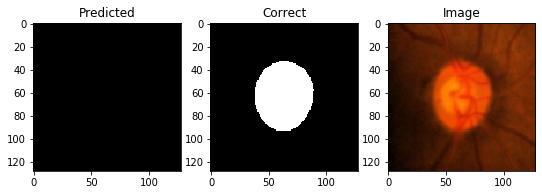

IOU: 0.0
Dice: 0.0
image #18


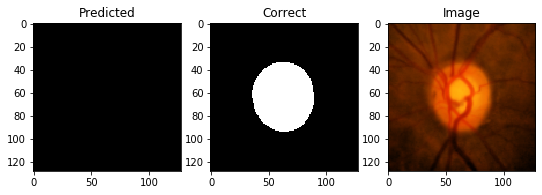

IOU: 0.0
Dice: 0.0
image #19


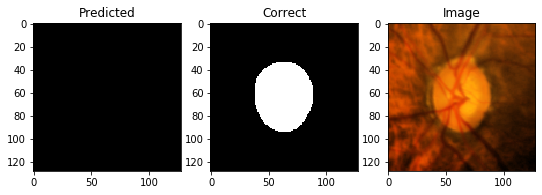

IOU: 0.0
Dice: 0.0
image #20


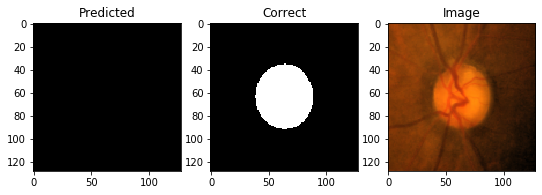

IOU: 0.0
Dice: 0.0
image #21


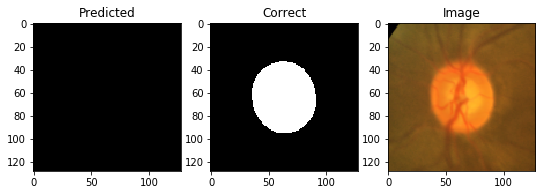

IOU: 0.0
Dice: 0.0
image #22


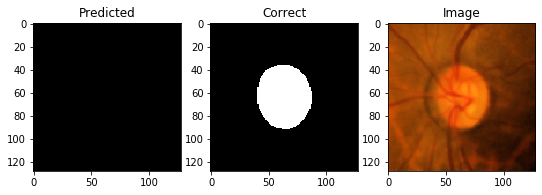

IOU: 0.0
Dice: 0.0
image #23


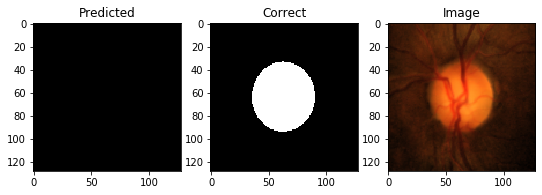

IOU: 0.0
Dice: 0.0
image #24


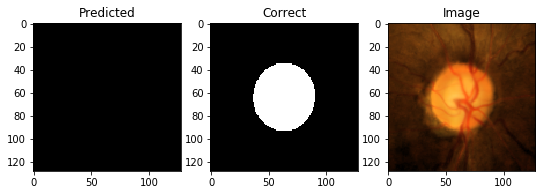

IOU: 0.0
Dice: 0.0
image #25


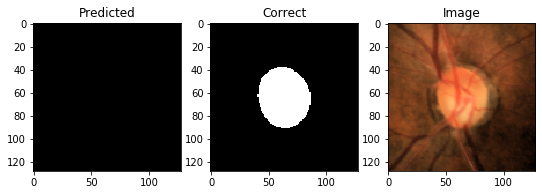

IOU: 0.0
Dice: 0.0
image #26


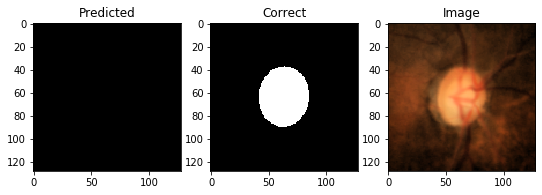

IOU: 0.0
Dice: 0.0
image #27


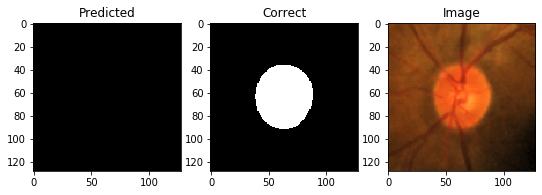

IOU: 0.0
Dice: 0.0
image #28


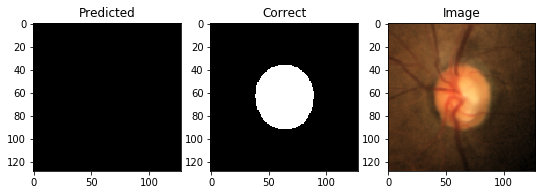

IOU: 0.0
Dice: 0.0
image #29


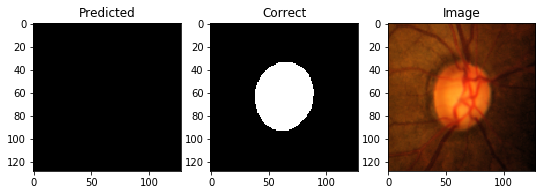

IOU: 0.0
Dice: 0.0
image #30


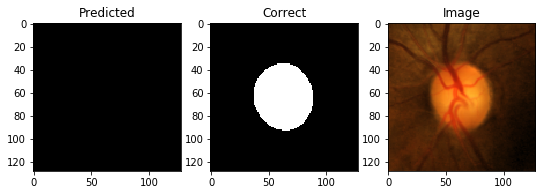

IOU: 0.0
Dice: 0.0
image #31


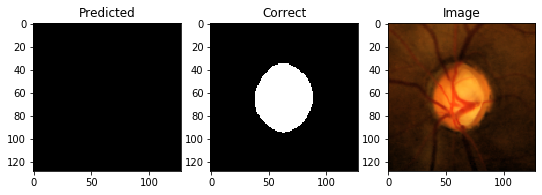

IOU: 0.0
Dice: 0.0
image #32


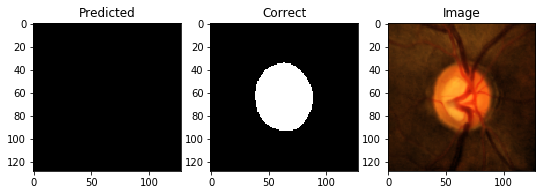

IOU: 0.0
Dice: 0.0
image #33


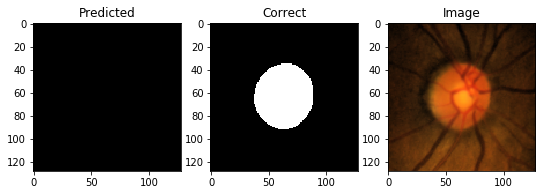

IOU: 0.0
Dice: 0.0
image #34


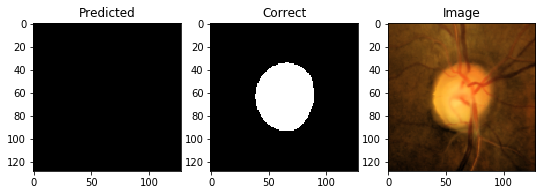

IOU: 0.0
Dice: 0.0
image #35


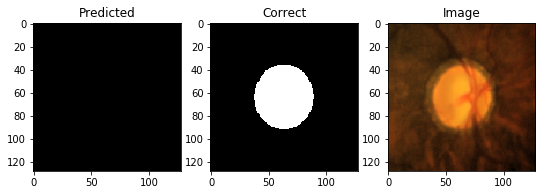

IOU: 0.0
Dice: 0.0
image #36


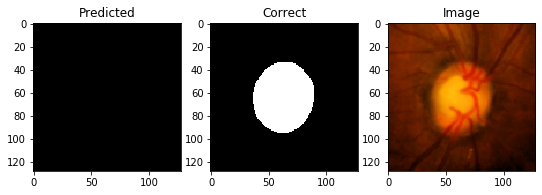

IOU: 0.0
Dice: 0.0
image #37


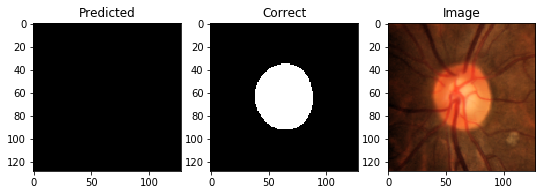

IOU: 0.0
Dice: 0.0
image #38


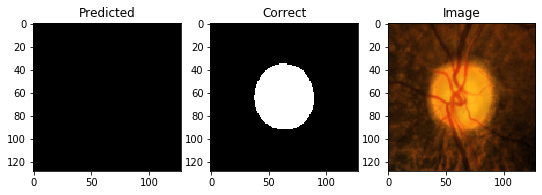

IOU: 0.0
Dice: 0.0
image #39


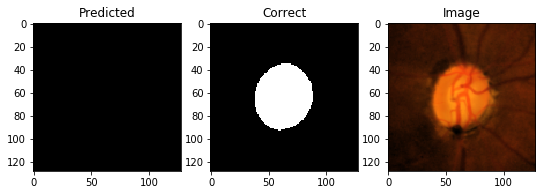

IOU: 0.0
Dice: 0.0
image #40


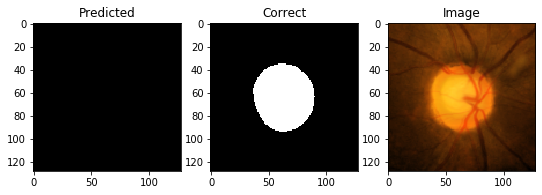

IOU: 0.0
Dice: 0.0
image #41


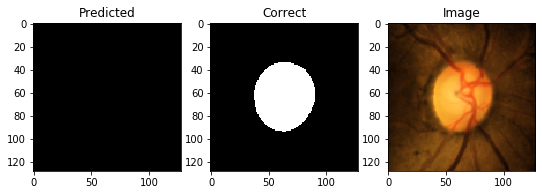

IOU: 0.0
Dice: 0.0
image #42


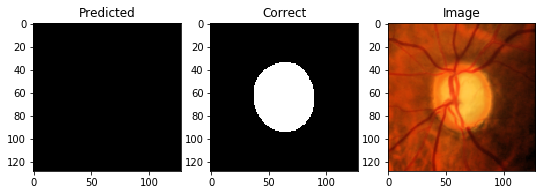

IOU: 0.0
Dice: 0.0
image #43


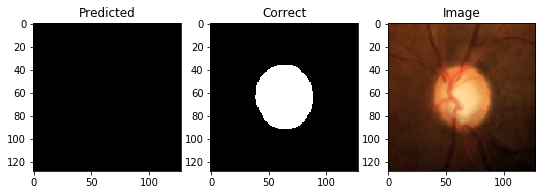

IOU: 0.0
Dice: 0.0
image #44


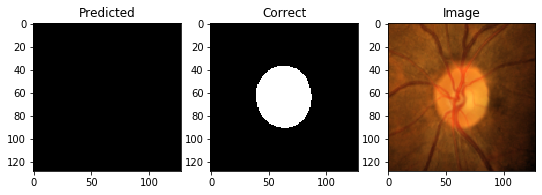

IOU: 0.0
Dice: 0.0
image #45


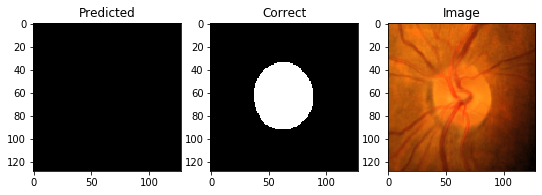

IOU: 0.0
Dice: 0.0
image #46


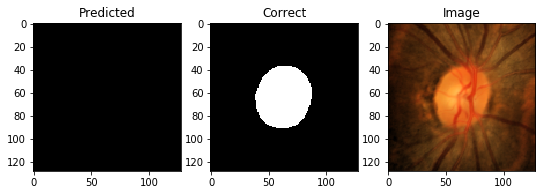

IOU: 0.0
Dice: 0.0
image #47


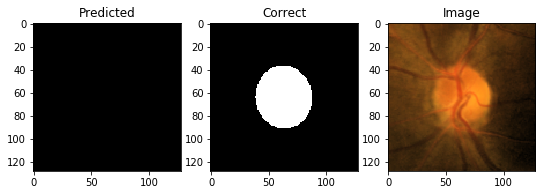

IOU: 0.0
Dice: 0.0
image #48


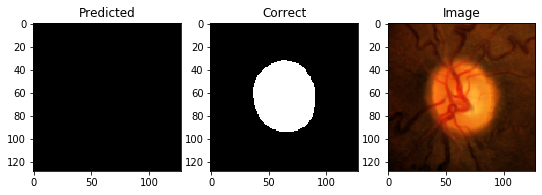

IOU: 0.0
Dice: 0.0
image #49


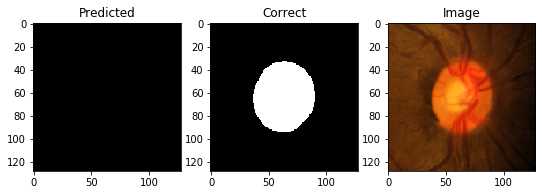

IOU: 0.0
Dice: 0.0


In [71]:
pred_iou, pred_dice = [], []
pred_disc = []

for i, img_no in enumerate(test_idx):
    print('image #{}'.format(img_no))
    img = img_train[img_no]
    batch_X = X_valid[i:i + 1]
    batch_z = Z_valid[i:i + 1]
    
    pred = (model.predict(batch_X)[0, 0] > 0.5).astype(np.float64)
    pred_disc.append(pred)
    corr = th_to_tf_encoding(batch_z)[0, ..., 0]
        
    fig = plt.figure(figsize=(9, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(pred, cmap=plt.cm.Greys_r)
    ax.set_title('Predicted')
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(corr, cmap=plt.cm.Greys_r)
    ax.set_title('Correct')
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(th_to_tf_encoding(batch_X)[0])
    ax.set_title('Image')
    plt.show()
    
    cur_iou = K.eval(mean_IOU_gpu(pred[None, None, ...], corr[None, None, ...]))
    cur_dice = K.eval(dice(pred[None, None, ...], corr[None, None, ...]))
    print('IOU: {}\nDice: {}'.format(cur_iou, cur_dice))
    pred_iou.append(cur_iou)
    pred_dice.append(cur_dice)

In [37]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.88481957
0.9318124774128806


In [38]:
def ellipseFitting(img):
    contours, hierarchy = cv2.findContours(img.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    ellipse = np.zeros(img.shape)
    diametro = []
    for ind, cont in enumerate(contours):
        (x,y),(MA,ma),angle = cv2.fitEllipse(cont)
        diametro.append((MA, ma))
        cv2.ellipse(ellipse,(int(x),int(y)),(int(MA/2), int(ma/2)),angle,0,360,(255,255,255),0)
    return ellipse, diametro

In [39]:
import cv2
cdrs = []
for i, img_no in enumerate(test_idx):
    cup = pred_cup[i]
    disc = pred_disc[i]
        
    c = cv2.Canny(cup.astype(np.uint8), 1,1)
    d = cv2.Canny(disc.astype(np.uint8), 1,1)
    
    el_c, diam_c = ellipseFitting(c)
    el_d, diam_d = ellipseFitting(d)
        
    if len(diam_d) > 0 and len(diam_c) > 0:
        cdr = diam_c[0][1]/diam_d[0][1]
        cdrs.append(cdr)
        print('image #{} - cdr = {}'.format(img_no, cdr))


image #0 - cdr = 0.7959553770044641
image #1 - cdr = 2.5943181844706773
image #2 - cdr = 0.7715123244327965
image #3 - cdr = 0.7152091702221255
image #4 - cdr = 0.7497682447155499
image #5 - cdr = 0.7275174564353213
image #6 - cdr = 0.8467512558832814
image #7 - cdr = 0.4260348274409503
image #8 - cdr = 0.7921016718303348
image #9 - cdr = 0.874442048338831
image #10 - cdr = 0.8320030462049364
image #11 - cdr = 0.8892464849475913
image #12 - cdr = 0.6806354395095642
image #13 - cdr = 0.7861529670340084
image #14 - cdr = 0.7250295149614733
image #15 - cdr = 0.8096947150863838
image #16 - cdr = 0.6951579714638968
image #17 - cdr = 0.6714348657741803
image #18 - cdr = 0.7042569022099471
image #19 - cdr = 0.7697079115555777
image #20 - cdr = 0.7154596743923402
image #21 - cdr = 0.8523058303931974
image #22 - cdr = 0.7416844636420372
image #23 - cdr = 0.726632927331785
image #24 - cdr = 0.8281362809368412
image #25 - cdr = 0.6668022996570586
image #26 - cdr = 0.7939083118706878
image #27 - c